## Paréntesis de Python

Para *desempaquetar los contenedores*

El * también se puede utilizar para desempacar los contenedores (lista, tupla o diccionario) y una función toma argumentos variables).  Esto es súper útil para evaluar función 

In [1]:
numeros = [1, 2, 3, 4, 5, 6]
*a, b, c = numeros
print(a) #tiene los primeros cuatro valores
print(b) #b el penúltimo valor
print(c) #c el último valor

[1, 2, 3, 4]
5
6


In [2]:
numeros = [1, 2, 3, 4, 5, 6]
a, *b, c = numeros
print(a)
print(b)
print(c)

1
[2, 3, 4, 5]
6


In [3]:
numeros = [1, 2, 3, 4, 5, 6]
a, b, *c = numeros
print(a)
print(b)
print(c)

1
2
[3, 4, 5, 6]


In [4]:
def operacion(a, b, c):
    print(a, b, c)
    return a+b+c

x = (1, 2, 3)
operacion(*x) #*x desempaquetando x para sacar a,b y c

1 2 3


6

# Integración Númerica

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline #magica ipython
plt.rcParams["figure.figsize"] = [12, 9] # ancho, alto de figuras
plt.rcParams["font.size"] = 20

from IPython.display import Math, Latex

from collections import namedtuple
from itertools import zip_longest

UsageError: unrecognized arguments: #magica ipython


## Integración

Como evaluamos
$$
I = \int_a^b f(x) \,d x
$$
Sea $F(x)$ la anti-derivada de $f(x)$ tal que
$$
I = \int_a^b f(x) \,d x = F(x)\bigr|_a^b = F(b) - F(a)
$$
En ocasiones no se puede encontrar la anti-derivada, por lo que se requiere encontrar la integral de manera numérica.

### Ejemplo:
Consideremos la integral:

$$
\int_0^1 \frac{dx}{1+x^5}
$$

encontrando la solución de manera simbólica

In [6]:
# sympy
from sympy import init_printing
from sympy import I, nroots, lambdify, diff, latex, symbols, pi, interpolating_poly, cos, N, integrate, Integral, exp, solve
from sympy.abc import x, epsilon, alpha

f1 = 1/(1 + x**5)
I1 = Integral(f1, (x, 0, 1)); I1
integrate(f1, x)

log(x + 1)/5 + RootSum(625*_t**4 + 125*_t**3 + 25*_t**2 + 5*_t + 1, Lambda(_t, _t*log(5*_t + x)))

La integral exacta es:
$$
I = \int_a^b f(x) \,d x
$$
Pero, numéricamente no podemos tener la integral exacta, así que buscamos una función $\tilde f(x)$ que aproxima $f(x)$. Ahora evaluamos
$$
I \approx \int_a^b \tilde f(x) \,d x \equiv \tilde I
$$


### Posibles aproximaciones

Queremos encontrar una $\tilde f(x)$ que aproxime a la función real y que pueda ser integrable fácilmente y de forma cerrada. La función aproximada puede ser polinomios, funciones trigonométricas, polinominos por partes, etc.

Con polinomios tenemos dos posibilidades:

1. *Polinomios de Taylor* para $f(x)$
2. *Polinomios interpolantes* para $f(x)$

### Ejemplo. Aproximando directamente por Taylor

$$
I = \int_0^1 e^{x^2}\, d x
$$
Utilizamos
\begin{align}
e^t &=  1 + t + \frac{1}{2!} t^2 + \dots + \frac{1}{n!} t^n + \frac{1}{(n+1)!} t^{n+1} e^{c_t} \\
e^{x^2} &=  1 + x^2 + \frac{1}{2!} x^4 + \dots + \frac{1}{n!} x^{2n} + \frac{1}{(n+1)!} x^{2n+2} e^{d_x} \\
\end{align}
con $0 \leq d_x \leq x^2$. Obtenemos ahora
\begin{multline}
I = \int_0^1 \bigl[ 1 + x^2 + \frac{1}{2!} x^4 + \dots + \frac{1}{n!} x^{2} \bigr] \,d x
+ \frac{1}{(n + 1)!} \int_0^1 \bigl[ x^{2n+2} e^{d_x} \bigr] \,d x\\
\end{multline}

\begin{multline}
I = \int_0^1 \bigl[ 1 + x^2 + \frac{1}{2!} x^4 + \dots + \frac{1}{n!} x^{2} \bigr] \,d x 
+ \frac{1}{(n + 1)!} \int_0^1 \bigl[ x^{2n+2} e^{d_x} \bigr] \,d x\\
\end{multline}

Para $n = 3$ obtenemos
\begin{align}
I &= 1 + \frac{1}{3} + \frac{1}{10} + \frac{1}{42} + E = 1.4571 + E\\
0 < E &\leq \frac{e}{24} \int_0^1 x^8\,d x = \frac{e}{216} = 0.0126
\end{align}


Integración por Taylor puede llegar a ser numéricamente costoso y más complicados de construir, además que necesitamos las derivadas. Los métodos de interpolación de polinomios son más baratos computacionalmente y fáciles de entender. (¡En el fondo usamos Lagrange!)

## Integración usando polinomios interpolantes

Entonces vamos a construir nuestro $\tilde f$ tal que 
$$
\int_a^b f(x)\,d x \approx \int_a^b \tilde f(x)\,d x
$$
utilizando interpolación.

Inicialmente trabajamos on nodos equidistantes en la construcción de los metodos de interpolación (Lagrange tradicional). 

## Interpolación lineal (Método del Trapecio)

Aproximamos linealmente $f(x)$, interpolando entre $a$ y $b$, es
$$
P_1(x) = \frac{(b-x) f(a) + (x - a) f(b)}{b - a}
$$
Esa $P_1$ es la que integramos
\begin{align*}
\int_a^b f(x)\,d x &\approx \int_a^b P_1(x)\,d x\\
  &= \frac{1}{2} (b - a) [f(a) + f(b)] \equiv I(a,b)\\
\end{align*}
La regla 
$$
I(a,b) \approx  \int_a^b f(x)\,d x   
$$
Para el intervalo [a,b] y se llama la *regla del trapecio*

Que no es otra cosa más que el área bajo la curva en a y b. Entonces, dividimos el área en pedasos, calculando el área en cada uno y luego los uniremos.

Notar que esta aproximación puede llegar a ser pobre si los rectángulos no encierran la mayor área real posible, i.e., si tomamos un supremo o infimo o un punto medio de éstos. Los supremos o infimos funcionan bien para áreas muuy pequeñas, pero esto no es sostenible computacionalmente.

Por lo que una mejor aproximación es encerrar el área en trapesoides en lugar de rectángulos.

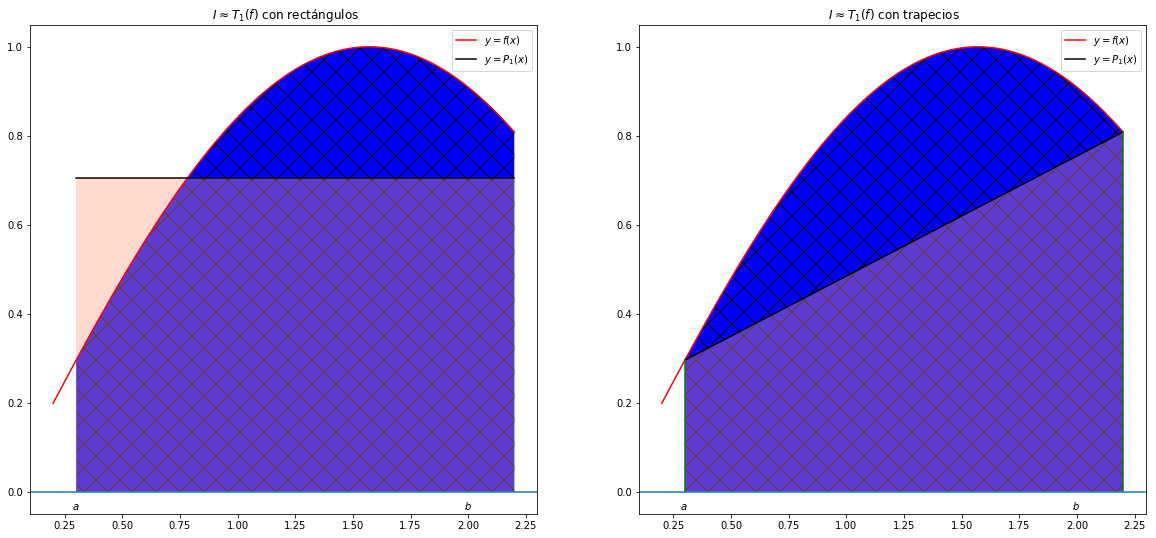

In [9]:
#Esta es la recta del punto medio, modifiquenla para que vean que no hay recta constante más eficiente para aproximarse
def recta(lista): 
    n=len(lista)
    ma=1.0    #el valor máximo del sino
    mi=np.sin(min(lista)) #el valor mínimo en el intervalo
    medio=abs(ma-mi) 
    return [medio]*n

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 9))
xr = np.linspace(0.2, 2.2, 100)
ax1.plot(xr, np.sin(xr), "r", label="$y=f(x)$")
xr2_lim = [0.3, 2.2]
xr2 = np.linspace(0.3, 2.2, 2) 
xr2f = np.linspace(*xr2_lim) #*xr2_lim (el paso inicial y final es lista...), cuadricula
## print('valores del mallado en x \n', xr2f) ## descomenta para que veas que hace
ax1.plot(xr2, recta(xr2), "k", label="$y=P_1(x)$")
ax1.fill_between(xr2f, 0, np.sin(xr2f), facecolor='b', hatch="\/")
ax1.fill_between(xr2, 0, recta(xr2), facecolor='#FFA08060')
#for x in xr2:
 #   ax1.plot([x, x], [0, np.sin(x)], "k")
ax1.axhline()
ax1.set_title(r" $I \approx T_1(f)$ con rectángulos")
ax1.annotate("$a$", xy=(0.28, -0.04))
ax1.annotate("$b$", xy=(1.98, -0.04))
ax1.legend(); 

ax2.plot(xr, np.sin(xr), "r", label="$y=f(x)$")
ax2.plot(xr2, np.sin(xr2), "k", label="$y=P_1(x)$")
ax2.fill_between(xr2f, 0, np.sin(xr2f), facecolor='b', hatch="\/")
ax2.fill_between(xr2, 0, np.sin(xr2), facecolor='#FFA08060')
for x in xr2:
    ax2.plot([x, x], [0, np.sin(x)], "g")
ax2.axhline()
ax2.set_title(r" $I \approx T_1(f)$ con trapecios") # r'string'  raw (crudo) en latex aparezca como tal 
ax2.annotate("$a$", xy=(0.28, -0.04))
ax2.annotate("$b$", xy=(1.98, -0.04))
ax2.legend(); 

Bueno, la deducción anterior sólo es de un fragmento del intervalo. Todavía tendríamos que hacer la suma de los k pedazos. 

## Otra forma más sencilla

Podemos no pensar en una interpolación lineal, sino simplificar el argumento con la aproximación mediante trapecios (ya nos convencimos que es la mejor línea que podemos aproximar). Entonces, la deducción queda así: 

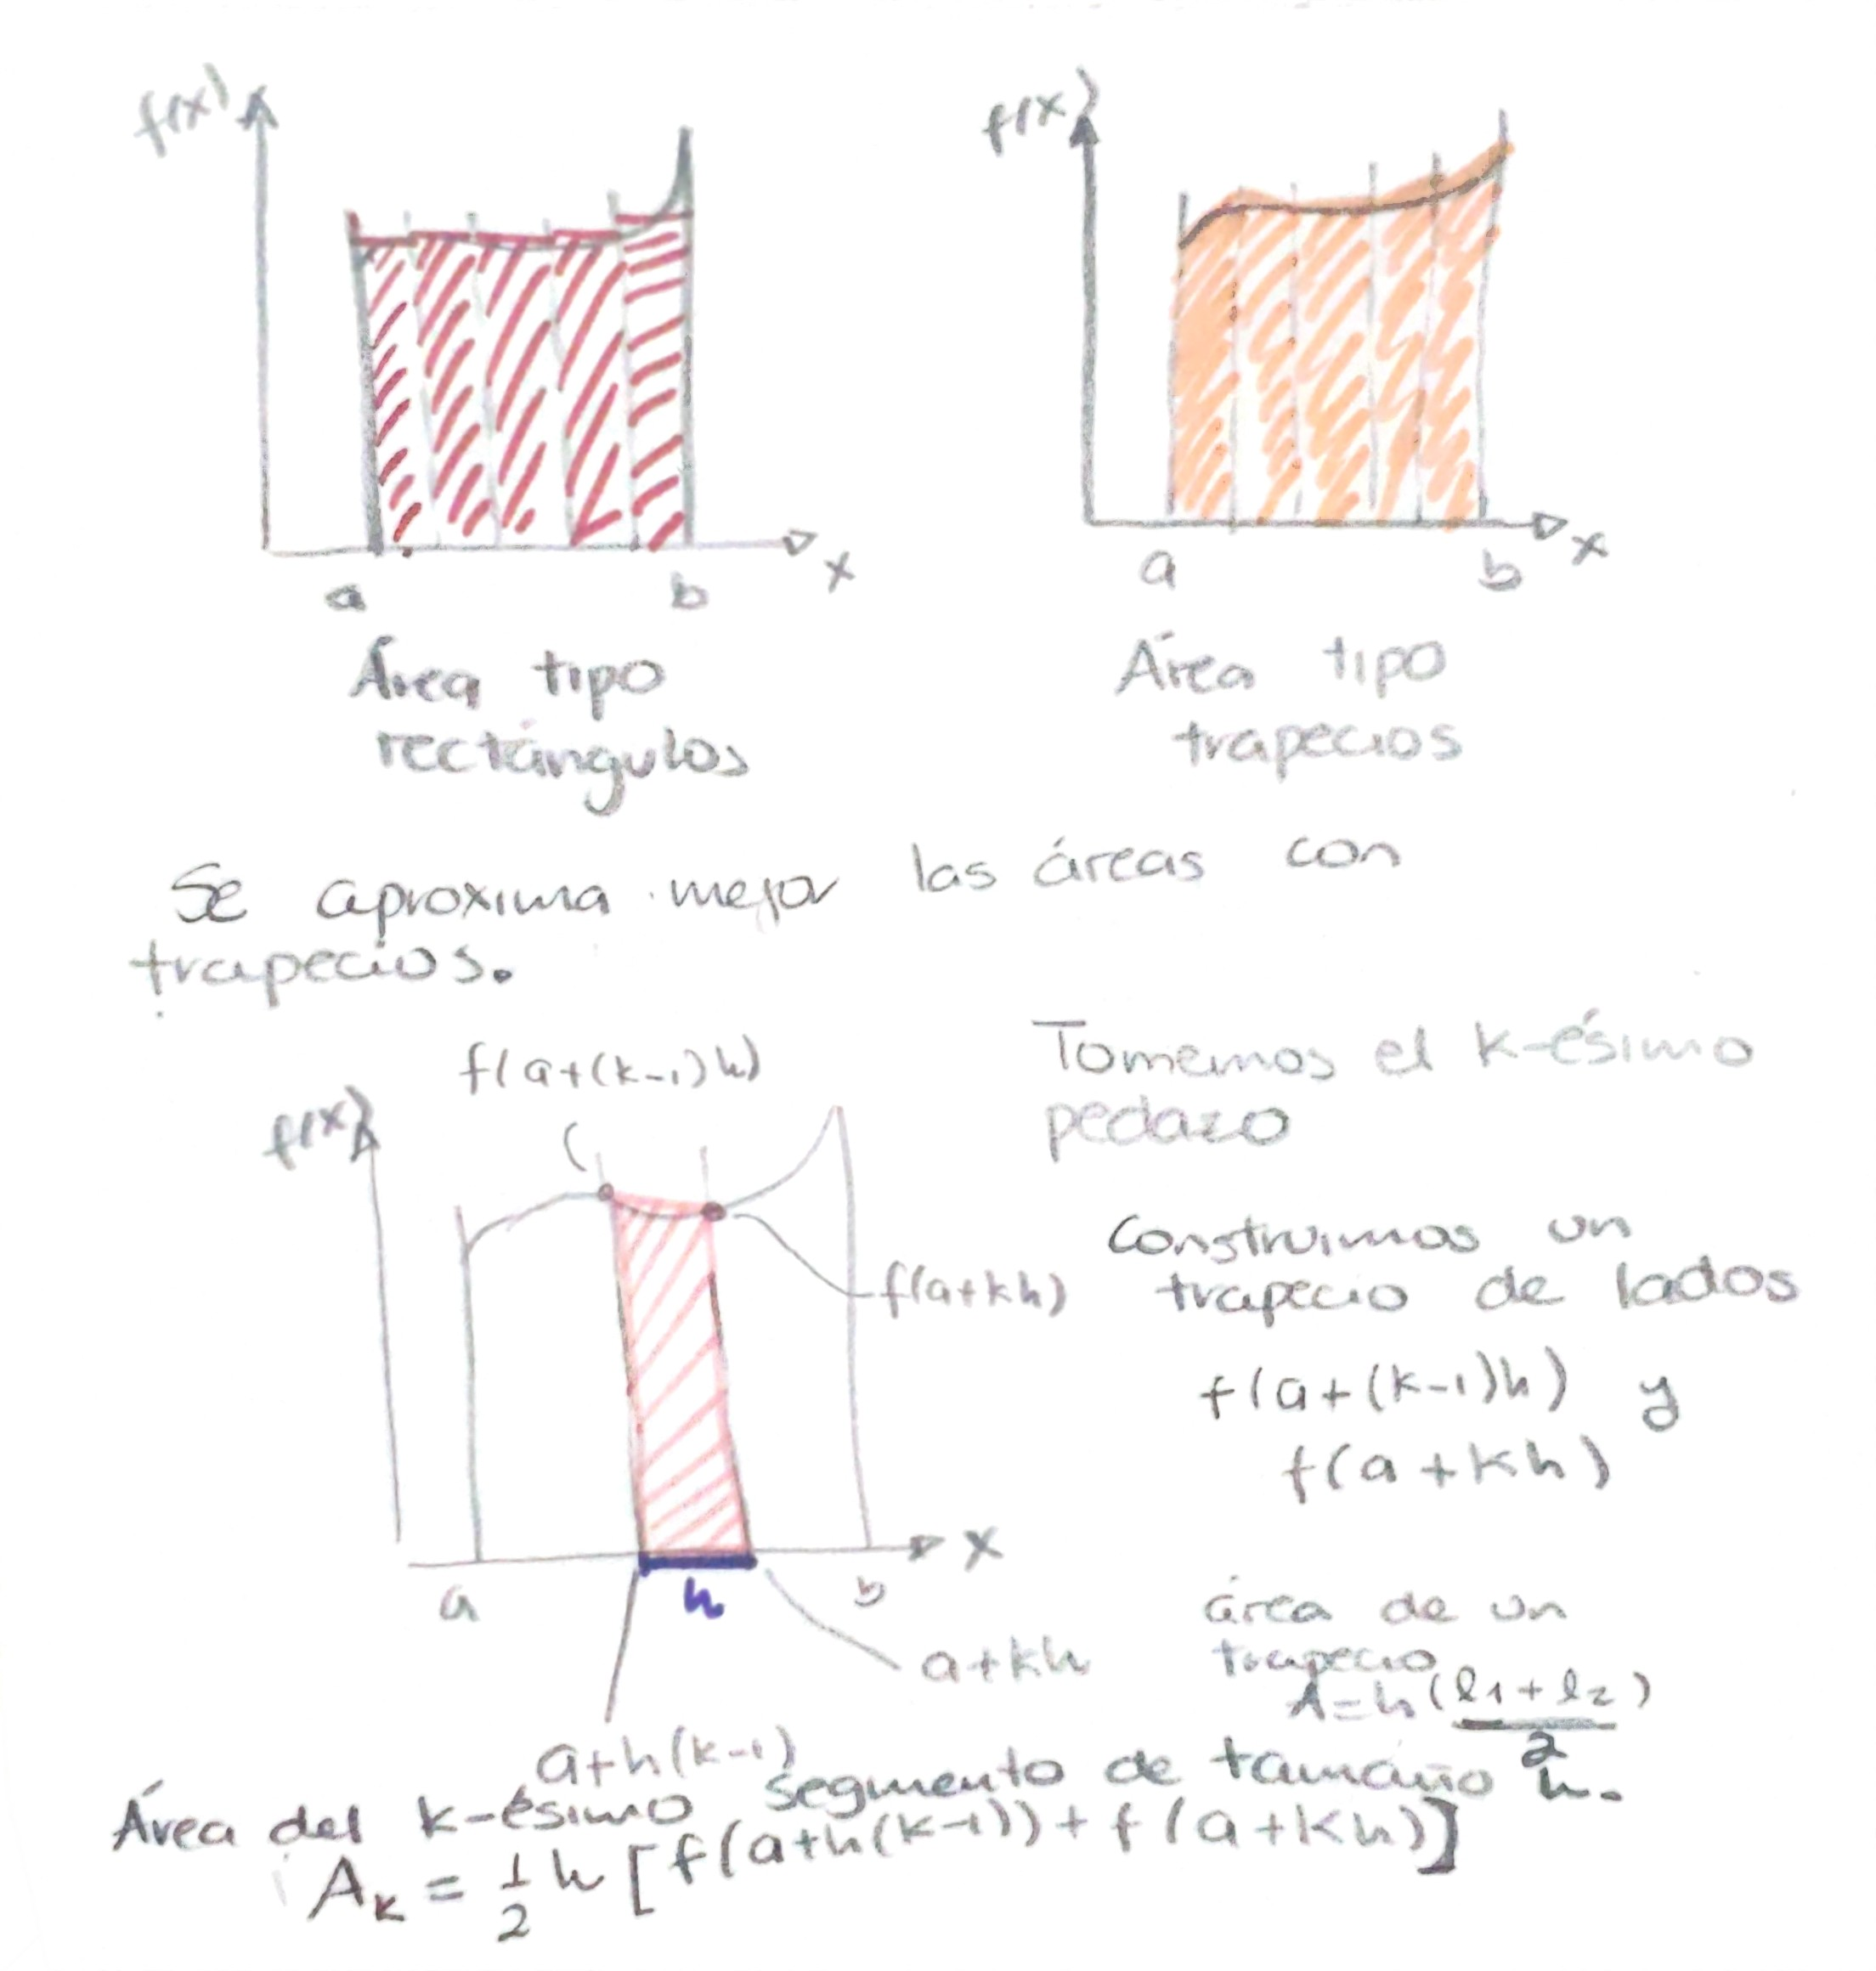

In [8]:
from IPython.display import Image
Image("Deduccion_Trapecio_1.jpg")

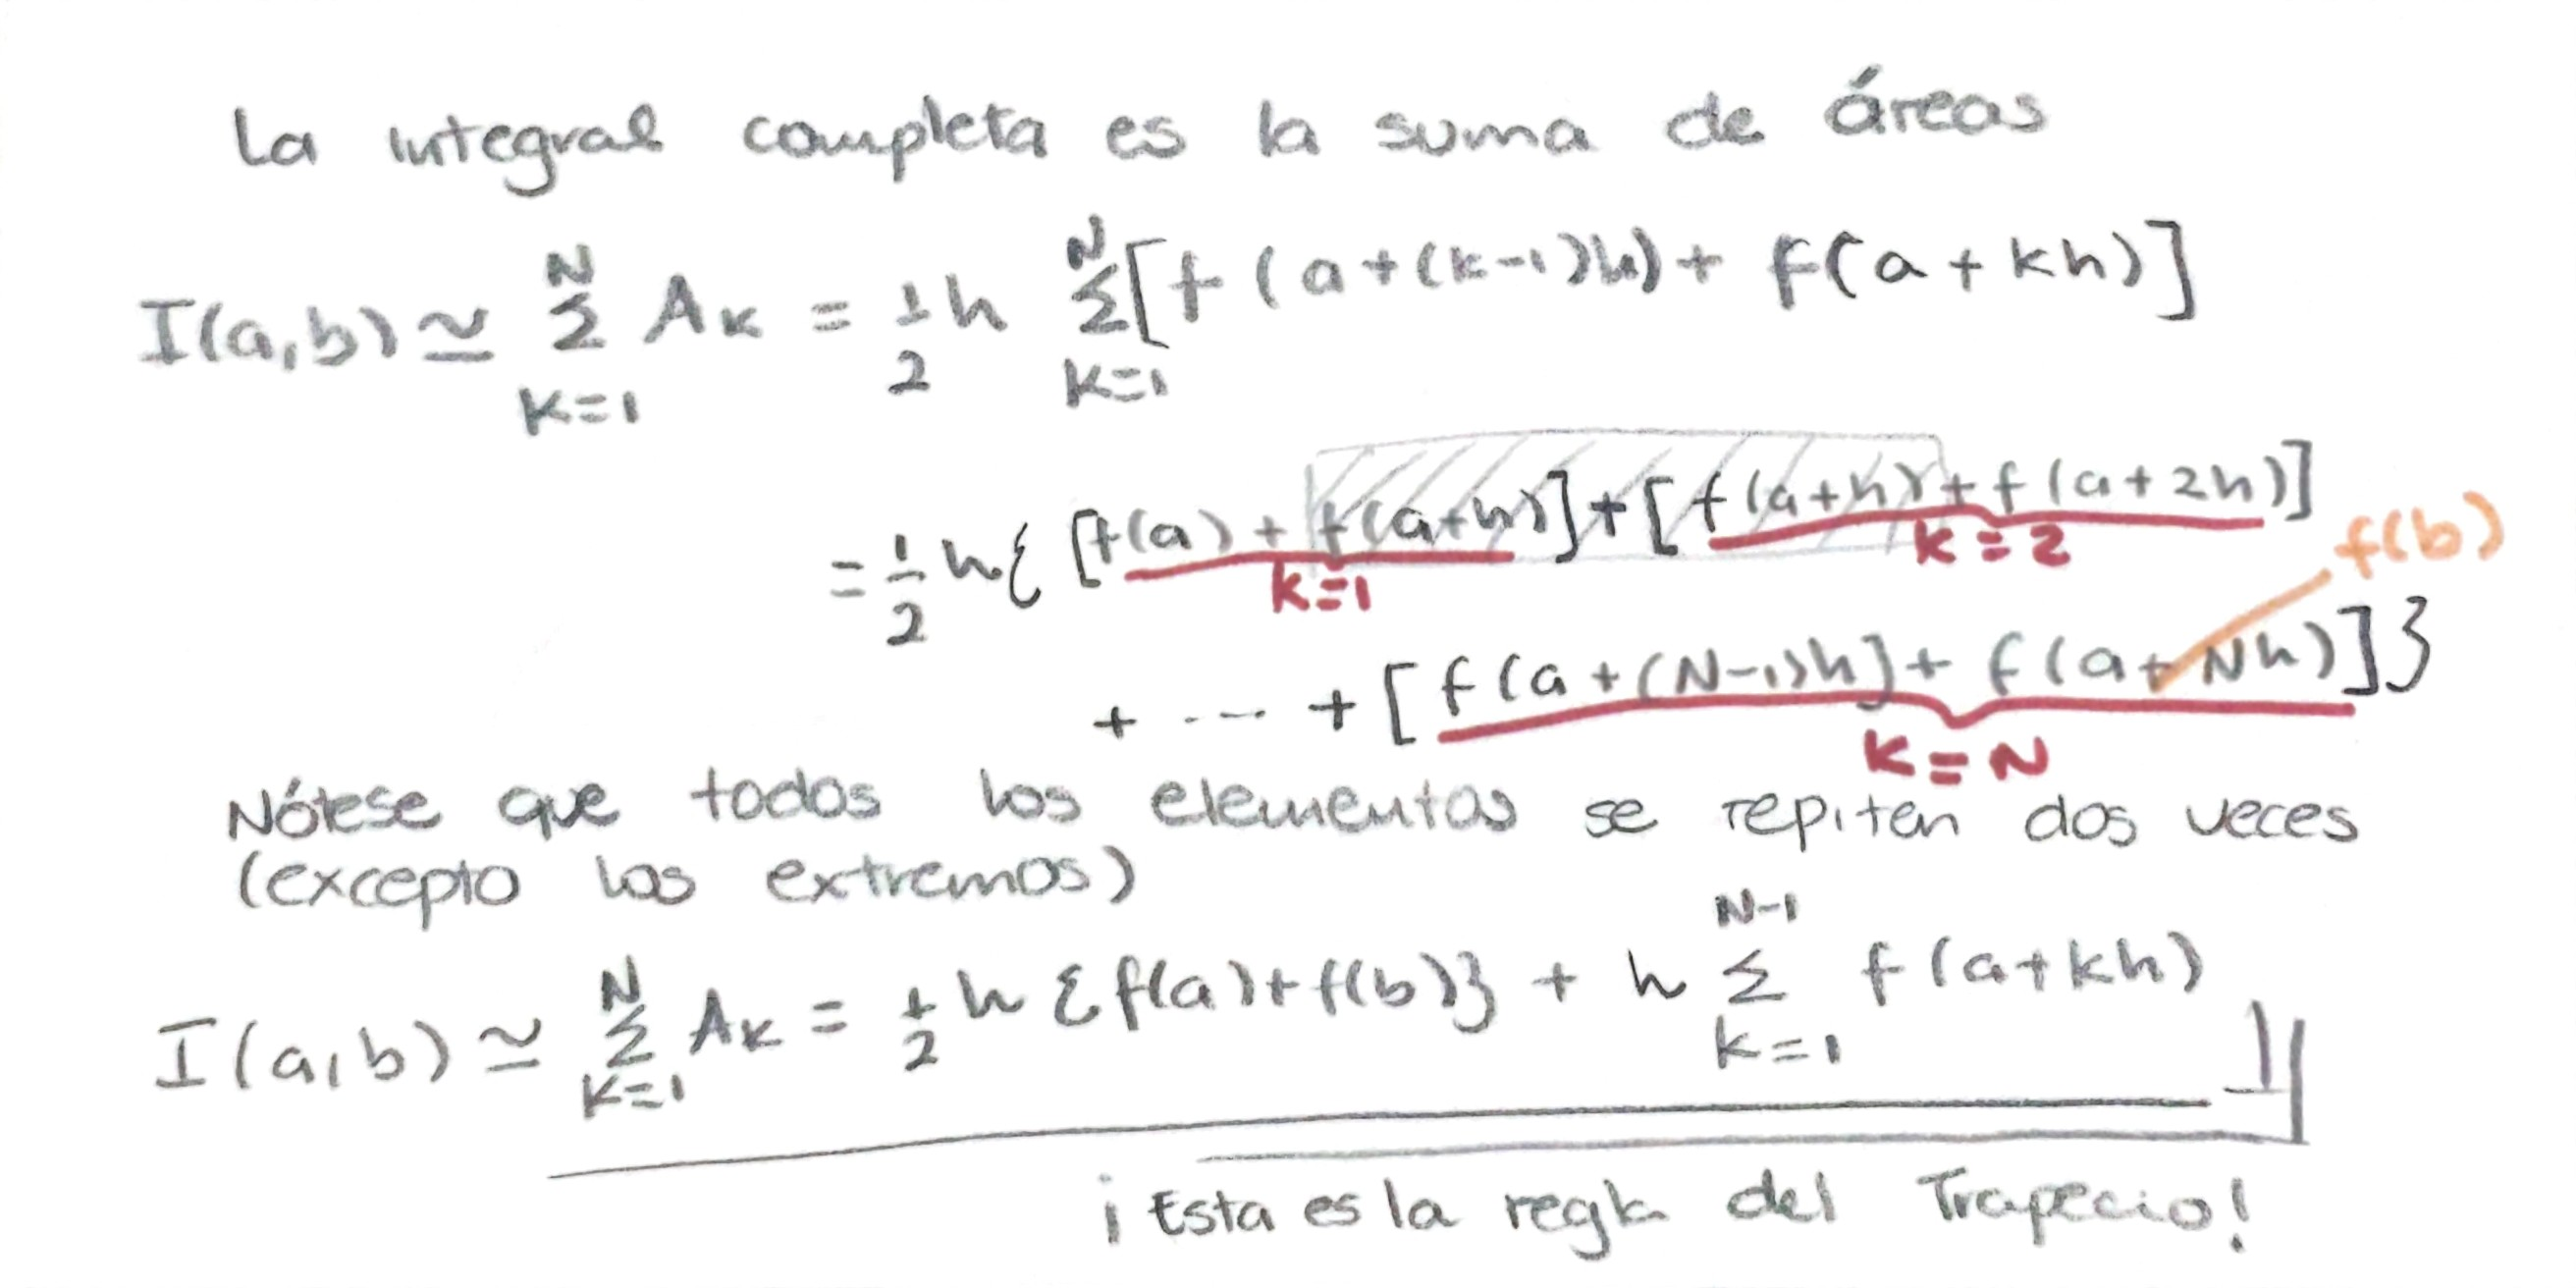

In [9]:
from IPython.display import Image
Image("Deduccion_Trapecio_2.jpg")

### Ejemplo

\begin{align}
\int_0^{2} (x^4-2x+1)dx &= \left[  \frac{x^5}{5}-\frac{2x^2}{2}+x \right]_0^2 
& = 4.4\\
\end{align}


In [10]:
funcion=lambda x:x**4-2*x+1

def trapecio(f,a,b,N):
         ### Programa tu propia función

valor_real=4.4 #valor real de x4-2x+1
val_num=trapecio(funcion,0,2,10)
er_por= (abs(val_num-valor_real)/valor_real)*100
print('La integral es %f con error de %f'%(val_num,er_por))

La integral es 4.506560 con error de 2.421818


### Ejemplo

Evaluamos 
$$
\int_0^{\pi/2} \sin x\,d x
$$

In [11]:
def trapecio1(f, rang, exact, log_n=8):
    T1 = (rang[1] - rang[0]) / 2 * (f(rang[0]) + f(rang[1]))
    err1 = exact - T1
    res = [[1, T1, err1, np.nan]]
    h = rang[1] - rang[0]
    n = 1
    for i in range(log_n):
        h /= 2
        Tn = T1 / 2
        for j in range(n):
            Tn += h * f(rang[0] + h + 2*j*h)
        n *= 2
        err_n = exact - Tn 
        res.append([n, Tn, err_n, err1 / err_n])
        err1 = err_n
        T1 = Tn
    return res

tabt = trapecio1(np.sin, (0, np.pi/2), 1)

In [12]:
tabt = pd.DataFrame(tabt, columns=["$n$", "$T_n(f)$", "Error", "Ratio"]) 
tabt.style.format(dict(zip(tabt.columns, ["{:g}", "{:.9f}", "{:.2e}", lambda x: x])))

,$n$,$T_n(f)$,Error,Ratio
0,1,0.785398163,2.15e-01,nan
1,2,0.948059449,5.19e-02,4.131681939078505
2,4,0.987115801,1.29e-02,4.031337215586981
3,8,0.996785172,3.21e-03,4.007741182738879
4,16,0.999196680,8.03e-04,4.001929561140479
5,32,0.999799194,2.01e-04,4.000482033193149
6,64,0.999949800,5.02e-05,4.000120486015923
7,128,0.999987450,1.25e-05,4.000030120181557
8,256,0.999996863,3.14e-06,4.0000075303515


Como vemos el método del Trapecio es muy simple y hasta arcaíco. Pero, es la base de muchos métodos numéricos más complejos, e incluso, sofisticados. 

1. Ventajas
Método simple de entender y simple de programar
Está implementado en todos lados

2. Desventajas
Tiene una mala precisión
Necesita un gran poder de cómputo (h muy pequeñas y muchos pasos)

## Interpolación cuadratica (Método de Simpson)

Para evaluar la integral 
$$
I = \int_a^b f(x)\,d x
$$
usamos una aproximación cuadratica para $f(x)$. Interpolamos en los puntos $\{a, c, b\}$ con $c = 1/2 (a + b)$. Definimos $h = 1/2 (b - a)$. El polinomio interpolante es
\begin{align}
P_2(x) =& \frac{(x - c)(x - b)}{2h^2} f(a)+ \frac{(x - a)(x - b)}{-h^2} f(c)\\
&+ \frac{(x - a)(x - c)}{2h^2} f(b)\\
\end{align}
Nos da la aproximación
\begin{align}
\int_a^b f(x)\,d x &\approx \int_a^b P_2(x)\,d x\\
  &= \frac{h}{3} [f(a) + 4f(c) + f(b)] \equiv S(f)\\
\end{align}
Esta regla es la *regla de Simpson*.

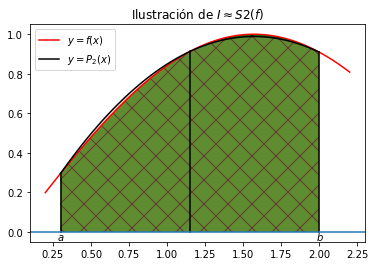

In [13]:
from scipy.interpolate import lagrange
xr = np.linspace(0.2, 2.2, 100)
plt.plot(xr, np.sin(xr), "r", label="$y=f(x)$")
xr2_lim = [0.3, 2]
xr2 = np.linspace(*xr2_lim, 3) #3 es el que genera la interpolacion P2
p2 = lagrange(xr2, np.sin(xr2))
xr2f = np.linspace(*xr2_lim)
plt.plot(xr2f, p2(xr2f), "k", label="$y=P_2(x)$") #grafico P2 generado con Lagrange
plt.fill_between(xr2f, 0, np.sin(xr2f), facecolor='green', hatch="\/")
plt.fill_between(xr2f, 0, p2(xr2f), facecolor='#FFA08060')
for x in xr2:
    plt.plot([x, x], [0, np.sin(x)], "k")
plt.axhline()
plt.title(r"Ilustración de $I \approx S2(f)$")
plt.annotate("$a$", xy=(0.28, -0.04))
plt.annotate("$b$", xy=(1.98, -0.04))
plt.legend();

Ya que tenemos la aproximación del k-ésimo pedazo
\begin{align}
\int_a^b f(x)\,d x &\approx \int_a^b P2(x)\,d x\\
  &= \frac{h}{3} [f(a) + 4f(c) + f(b)] \equiv S_2(f)\\
\end{align}

Extendemos la suma
\begin{align}
    I(a,b) &\approx \sum_{j=1}^N S_k(f)\\
    I(a,b) &\approx \frac{h}{3} [f(a)+4f(a+h)+2f(a+2h)] + \frac{h}{3}[ f(a+2h)+4f(a+3h)+2f(a+4h)]  \cdots 
    \frac{h}{3}[ f(a+(N-2))+4f(a+h(N-1))+f(a+Nh)]
\end{align}

Juntando los términos pares y los impares, tenemos la fórmula a programar

$$
I=\frac{h}{3} [f(a)+f(b)+2\sum_{k=2}^{N-2}f(a+kh)+4\sum_{k=1}^{N-1}f(a+kh) ]
$$

In [14]:
def simpson(f,a,b,N):
    ### Programa tu propia función 

print(simpson(funcion,0,2,100))

4.400000042666677


Un problema clásico de la mecánica cuántica es definir una densidad de probabilidad gaussiana $\rho(x)=Ae^{-x^2}$ y encontrar el primer y segundo momento.

In [15]:
from pylab import *
def gaussiana_dis(x):
    return exp(-x**2)

def primer_momento(x):
    return A*x*exp(-x**2)

def segundo_momento(x):
    return A*(x**2)*exp(-x**2)

Integral=simpson(gaussiana_dis,-10,10,100000)
A=Integral #Necesario para calcular los momentos
primer_mom=trapecio(primer_momento,-10,10,100000)
segundo_mom=trapecio(segundo_momento,-10,10,100000)
print('La constante de normalizacion A=%3.2f para la distribución e^x^2'%(1/A))
print(primer_mom,segundo_mom)

La constante de normalizacion A=0.56 para la distribución e^x^2
1.7775618825202714e-16 1.5707963267948766


## Algunas aplicaciones

A veces ocurrirá que tengan un archivo de texto con datos obtenidos de laboratorio y a estos datos les quieren aplicar un método numérico, como por ejemplo, trapecio. Entonces, usaremos la función loadtxt que vive en numpy

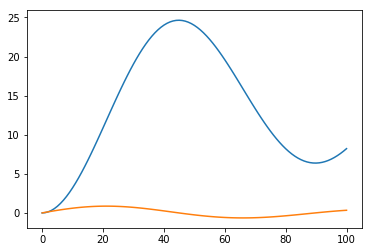

In [16]:
from numpy import loadtxt, zeros,empty
from pylab import plot
datos = loadtxt('velocidades.txt',)

t,v = datos[:,0],datos[:,1]

h = 1#es equivalente a delta t y tiene unidades de seg
N = len(t)

distancia = zeros(N)
for k in range(1,N):
    distancia[k] = distancia[k-1] + h*(v[k] + v[k-1])/2 #aqui integramos
plot(t,distancia,label='distancia')
plot(t,v,label='velocidad')

Otra aplicación, con nuestra función simpson, obtengamos las primeras funciones de bessel

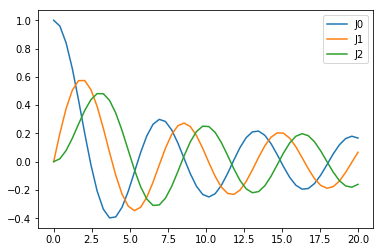

In [17]:
from pylab import *


def J(m,x):
    f=lambda theta: cos(m*theta - x*sin(theta)) #funcion generadora
    N = 1000
    a = 0.
    b = pi
    s=simpson(f,a,b,N)
    #simpson_alternativo(f,a,b,N)    
    return s/pi

x = linspace(0,20)

plot(x,J(0,x),label='J0')
plot(x,J(1,x),label='J1')
plot(x,J(2,x),label='J2')
legend()